**Lab assignment 1**

Notebook focused on how to implement and test additional heuristics, as well as on comparing heuristics.

This is the main notebook on which to develop and validate the additional heuristic functions requested for this lab assignment.

In [96]:
# pip install matplotlib tabulate numpy

In [97]:
import search
from search import *
import math

**Method implementing an additional heuristic**

In [98]:
def misplacedTiles(state, end_state):
    """
    Heuristic that returns the number of misplaced tiles
    """
    misplaced = 0

    for i in range(len(state)):
        if state[i] != end_state[i] and state[i] != 0:
            misplaced += 1
    
    return misplaced

In [99]:
def aStarEuclidean(state, end_state):
    """
    Heuristic that returns the sum of the euclidean distances of the tiles
    """
    distance = 0
    side = int(math.sqrt(len(state)))  # Amount of rows and columns
    
    for i in range(1, len(state)):
        index = state.index(i)
        row = index // side
        col = index % side

        goal = end_state.index(i)
        dest_row = goal // side
        dest_col = goal % side

        distance += math.sqrt(pow(row - dest_row, 2) + pow(col - dest_col, 2))
    
    return distance

In [100]:
def rowsColumns(state, end_state):
    value = 0
    side = int(math.sqrt(len(state)))  # Amount of rows and columns

    for i in range(len(state)):
        val_state = state[i]
        row = i // side
        col = i % side

        end_state_index = end_state.index(val_state)
        dest_row = end_state_index // side
        dest_col = end_state_index % side

        if row != dest_row:
            value += 1
        if col != dest_col:
            value += 1
    
    return value

In [101]:
def aStarEuclideanLC(state, end_state):
    """
    Heuristic that returns the sum of the euclidean distances of the tiles + the linear
    conflict in the states
    """
    
    return aStarEuclidean(state, end_state) + getLinear_conflict(state, end_state)

In [ ]:
def custom(state, end_state):
    pos0 = state.index(0)
    pos0_end = end_state.index(0)

    side = math.sqrt(len(state))

    distance = abs(pos0 // side - pos0_end // side) + abs(pos0 % side - pos0_end % side)
    cost = 2 if distance == 0 else distance

    return cost

**Methods to simplify the execution of the algorithms available**

Let's include the new heuristic

In [103]:
# Auxiliary methods to execute the algorithms

def run_algorithm(algorithm_name, initial_state, end_state, size, depth=50, heuristic_func=None):
    """
    Executes the algorithm specified by its name and returns its results.
    Returns:
        dict: Dictionary with the results of the algorithm, or None if an error occurs
    """
    solution_data = None

    if algorithm_name == 'BFS':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, lambda s, es: 0, size)
        print("BFS executed")

    elif algorithm_name == 'DFS (Graph Search)':
        solution_data = graphSearch(initial_state, end_state, lambda x: -1, lambda s, es: 0, size, maximum_depth=depth)
        print("DFS (Graph Search) executed")

    elif algorithm_name == 'DFS-B':
        results_dict, _ = DFS_B(initial_state, end_state, size=size, maximum_depth=depth)
        solution_data = results_dict
        print("DFS-B executed")

    elif algorithm_name == 'Voraz (Manhattan)':  # Greedy (Manhattan)
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 0, manhattan_h_search, size)
        print("Voraz (Manhattan) executed")

    elif algorithm_name == 'ID':
        solution_data = ID_B(initial_state, end_state, size=size)
        print("ID executed")

    elif algorithm_name == 'A* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, manhattan_h_search, size)
        print("A* (Manhattan) executed")

    elif algorithm_name == 'A (MD + LC)':
        md_lc_h_search = lambda s, es_local=end_state: get_md_plus_linear_conflict(s, es_local)
        solution_data = graphSearch(initial_state,end_state,  lambda x: 1, md_lc_h_search, size)
        print("A (Manhattan + Linear_conflict) executed")

    elif algorithm_name == 'IDA* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = IDA_B(initial_state, end_state, size, manhattan_h_search)
        print("IDA* (Manhattan) executed")

    ################################################################################################
    # we add the new heuristics
    ################################################################################################

    elif algorithm_name == 'Misplaced Tiles':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: misplacedTiles(s, end_state), size)
        print("Misplaced Tiles executed")

    elif algorithm_name == 'A* Euclidean':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: aStarEuclidean(s, end_state), size)
        print("A* Euclidean executed")
    
    elif algorithm_name == 'Rows Columns':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: rowsColumns(s, end_state), size)
        print("Rows Columns executed")
    
    elif algorithm_name == 'A* Euclidean LC':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: aStarEuclideanLC(s, end_state), size)
        print("A* Euclidean LC executed")
    
    elif algorithm_name == 'Custom':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: custom(s, end_state), size)
        print("Custom heuristic executed")

    ################################################################################################


    else:
        print(f"Algorithm {algorithm_name} not found!")
        return None

    if solution_data:
        if not solution_data['path'] or len(solution_data['path']) == 0:
            print(f"No solution found for {algorithm_name}")
        return {algorithm_name: solution_data}
    else:
        print(f"No solution data returned for {algorithm_name}")
        return {algorithm_name: {}}  # Return empty dict for the algorithm


def run_all_algorithms(initial_state, end_state, size, depth = 50):
    """
    Executes all the algorithms defined and returns their results.
    Returns:
        dict: Dictionary with the results of all the algorithms executed
    """
    algorithms = [
        'BFS',
        'DFS-B',
        'Voraz (Manhattan)',  # Greedy (Manhattan)
        'ID',
        'A* (Manhattan)',
        'A (MD + LC)',
        'IDA* (Manhattan)',
        'Misplaced Tiles',           ###   WE ADD THE LABEL FOR THE NEW HEURISTIC TO THE LIST
        'A* Euclidean',
        'Rows Columns',
        'A* Euclidean LC',
        'Custom'
    ]

    results = {}
    seen_algos = set()
    for algo in algorithms:
        if algo not in seen_algos:
            seen_algos.add(algo)
            algo_result = run_algorithm(algo, initial_state, end_state, size, depth)
            if algo_result and algo in algo_result:
                results[algo] = algo_result[algo]

    return results


**Example with size 3**

We define the initial state and the goal state, we run all the algorithms available, and we display the results.

BFS executed
DFS-B executed
Voraz (Manhattan) executed
ID executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
IDA* (Manhattan) executed
Misplaced Tiles executed
A* Euclidean executed
Rows Columns executed
A* Euclidean LC executed
Custom heuristic executed
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |    Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+=============+===================+==================+====================+
| BFS               |     22 |      22 | 0.373731    |            233687 |            86871 |             110729 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| DFS-B             |     38 |      40 | 1.54931     |           2028383 |          1301341 |                 41 |
+-------------------+--------+--

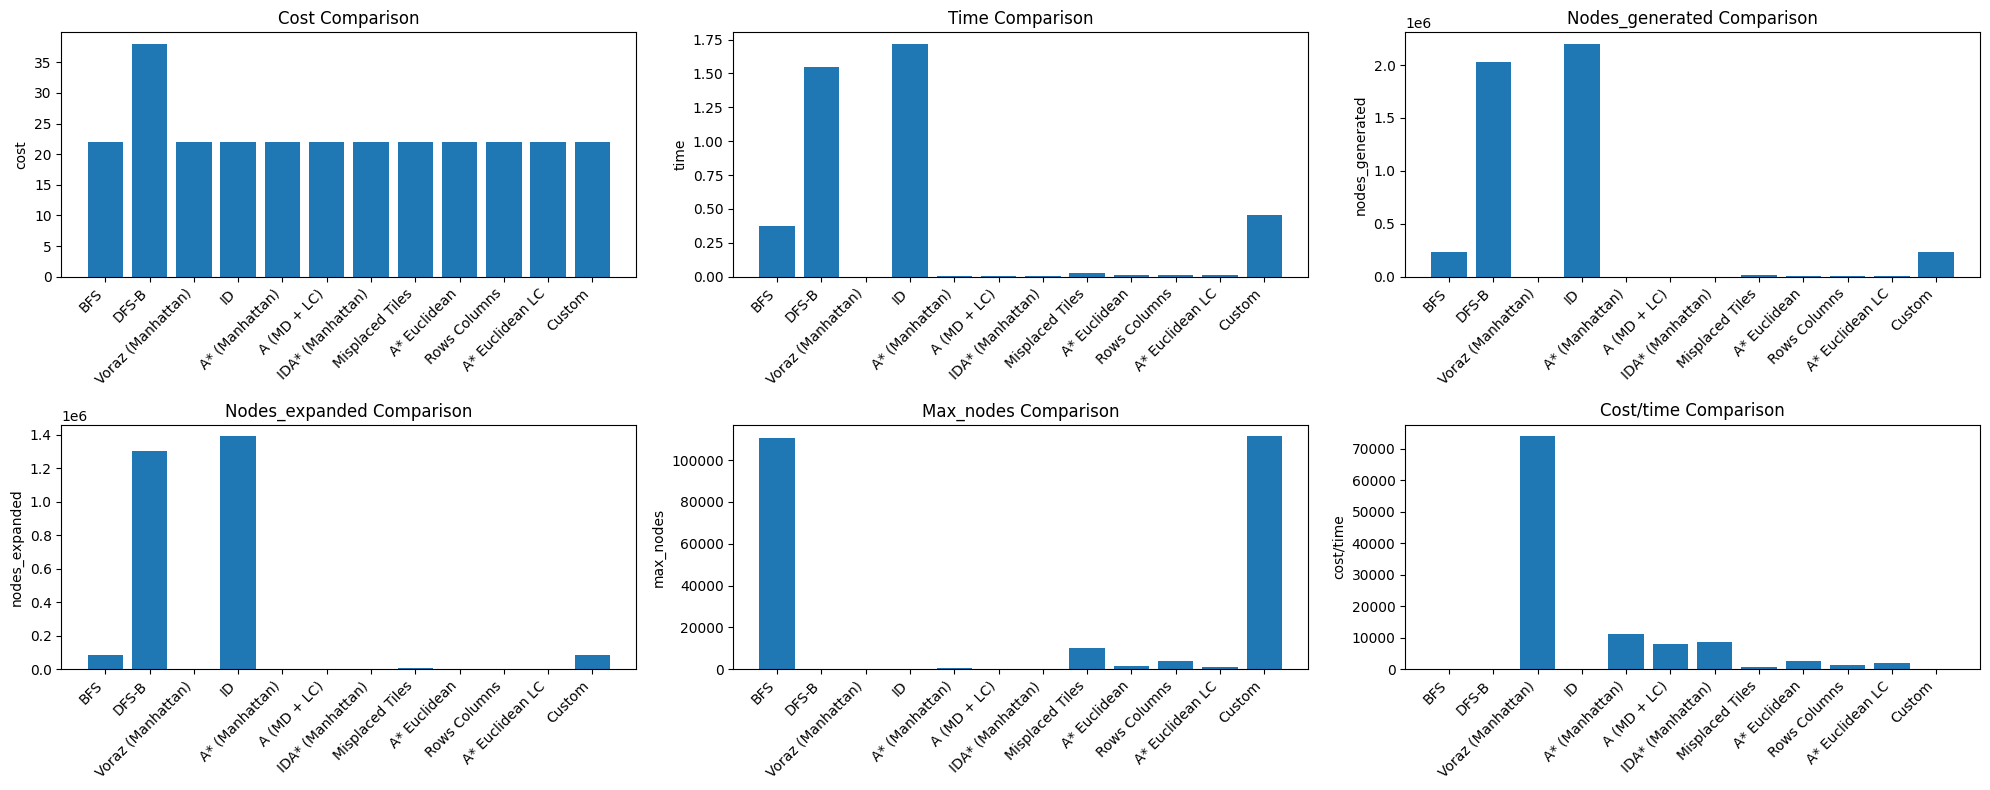

In [104]:
# Size 3

size = 3  # Example for a 3x3 puzzle

initial_state_matrix = [
    [7, 8, 1],
    [4, 0, 6],
    [2, 3, 5]
]


end_state_matrix = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run all of the algorithms and show the results as a table
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function that runs all the algorithms
    results = run_all_algorithms(initial_state, end_state, size, 40)
    show_results(results)
    plot_algorithm_comparison(results)
else:
    print("The puzzle is not solvable.")




**Question**

How does the new heuristic behave?  Is it A*?  Can you be sure about that?

**Reply:**
This heuristic finds a solution faster than A* (Manhattan) and expands less nodes. It's A*, but we don't know if it's admissible (we don't know if it will always find the optimal solution).
<br><br><br>

### **Question:** Determine which heuristics are A* and which ones are not. Justify your answers. Propose examples to support the justifications for your answers.

An A* algorithm is an informed search algorithm. This means it uses a heuristic function to guide its search of the goal. The heuristic function estimates the cost of reaching the goal from a specific node.
- **Not A\* algorithms / heuristics:**
BFS, DFS, Voraz (Manhattan), ID
- **A\* algorithms / heuristics:**
A* (Manhattan), A (MD + LC), IDA* (Manhattan), Misplaced Tiles, A* Euclidean, Rows Columns, A* Euclidean LC

These heuristic functions are used to estimate the remaining distance to the goal in A* algorithms.
<br><br><br>

**Now try with size 4**

In [105]:
 # Size 4

size = 4
initial_state_matrix = [
    [13, 2, 10, 3],
    [1, 12, 8, 4],
    [5, 0, 9, 6],
    [15, 14, 11, 7]
]


end_state_matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run some specific algorithms, including the new heuristic
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    # algo_result = run_algorithm('A* Euclidean', initial_state, end_state, size)
    # results.update(algo_result)

    # algo_result = run_algorithm('Misplaced Tiles', initial_state, end_state, size)
    # results.update(algo_result)

    show_results(results)
else:
    print("The puzzle is not solvable.")


A* (Manhattan) executed
Voraz (Manhattan) executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     41 |      41 |  3.63644   |            645273 |           215568 |             403054 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    111 |     111 |  0.0244982 |              4983 |             1594 |               3277 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+




**Question**

What do you think now?

**Answer**
It's not admissible, as the solution found is not the optimal one (A* (Manhattan) finds a solution with a lower cost).

**Example with size 5**

In [106]:
# Size 5

size = 5
initial_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [0, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 24, 23, 11]
]

end_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [11, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 23, 24, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Running a few specific algorithms
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    # algo_result = run_algorithm('A* Euclidean', initial_state, end_state, size)
    # results.update(algo_result)

    # algo_result = run_algorithm('Misplaced Tiles', initial_state, end_state, size)
    # results.update(algo_result)

    show_results(results)

else:
    print("The puzzle is not solvable.")



A* (Manhattan) executed
Voraz (Manhattan) executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     30 |      30 |  1.67844   |            182180 |            55355 |             121598 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    138 |     138 |  0.0496664 |              5718 |             1688 |               3985 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+




**Now try size n, auto-generating initial and goal states**

Here we consider how to generalize to n the size of the puzzle.

Initial state:

    1  5
 4  3  2
 8  6  7

End state:

 1  2  3
 4  5  6
 7  8   

Voraz (Manhattan) executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
Misplaced Tiles executed
A* Euclidean executed
Rows Columns executed
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |    Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+=============+===================+==================+====================+
| Voraz (Manhattan) |     26 |      26 | 0.000463247 |               144 |               54 |                 90 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| A* (Manhattan)    |     20 |      20 | 0.00209689  |               791 |              301 |                475 |
+-------------------+--------+---------+-------------+-----------

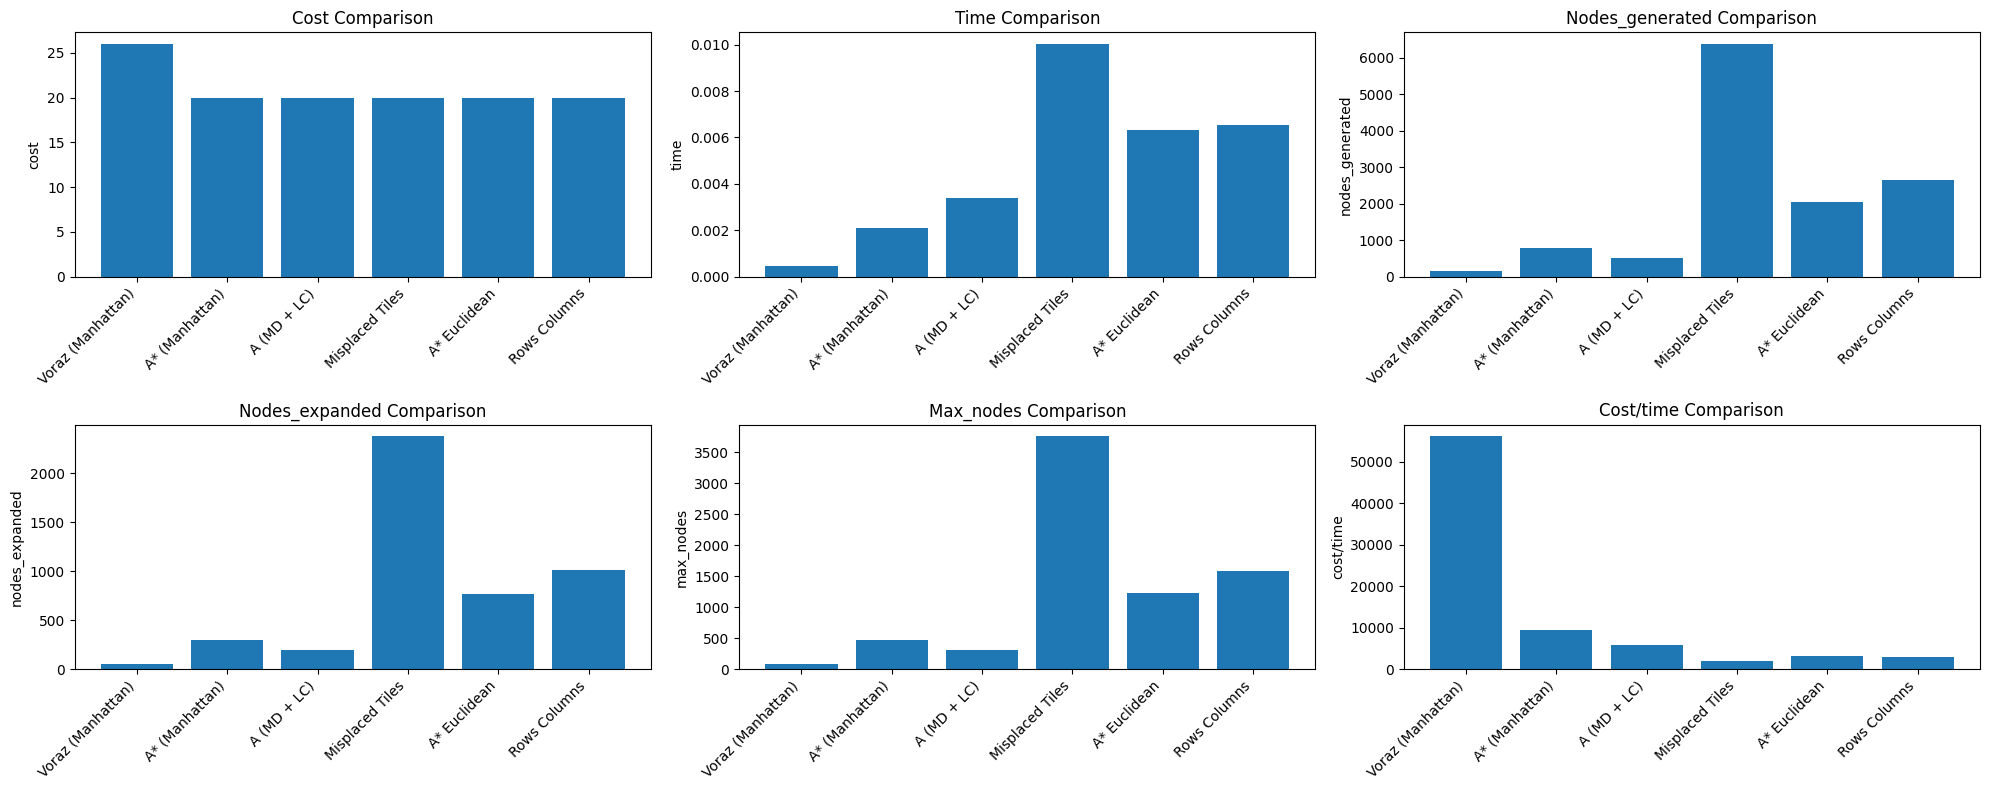

In [107]:
# Try with size n, auto-generating initial and goal states
size = 3
end_state = generate_ordered_state(size)
#end_state = generate_spiral_state(size)
initial_state = generate_random_state(size, end_state)


print("Initial state:\n")
visualize_state(initial_state)

print("\nEnd state:\n")
visualize_state(end_state)

# Running some specific algorithms
results = {}

print()
alg_results = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A (MD + LC)', initial_state, end_state, size)
results.update(alg_results)
algo_result = run_algorithm('Misplaced Tiles', initial_state, end_state, size)
results.update(algo_result)
algo_result = run_algorithm('A* Euclidean', initial_state, end_state, size)
results.update(algo_result)
algo_result = run_algorithm('Rows Columns', initial_state, end_state, size)
results.update(algo_result)

show_results(results)
plot_algorithm_comparison(results)

#show_path_for_algorithm(results, 'A (MD + LC)', size)